In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [3]:
df = pd.read_csv(data_url)
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Modell trainiert!")

Modell trainiert!


In [6]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Genauigkeit der Titanic-KI: {accuracy * 100:.2f} %")

Genauigkeit der Titanic-KI: 80.45 %


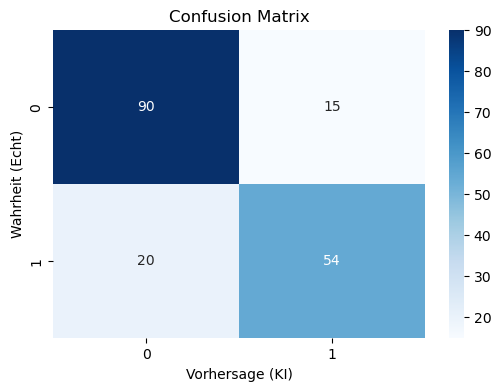

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # fmt='d' heißt Dezimalzahl (kein Komma)
plt.title('Confusion Matrix')
plt.ylabel('Wahrheit (Echt)')
plt.xlabel('Vorhersage (KI)')
plt.show()

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

